# Zuri Velo Counting

How many people cycle their bikes in Zuri every day?

In [1]:
URL = "https://data.stadt-zuerich.ch/dataset/verkehrszaehlungen_werte_fussgaenger_velo/resource/ed354dde-c0f9-43b3-b05b-08c5f4c3f65a/download/2016verkehrszaehlungenwertefussgaengervelo.csv"

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(URL, "2016.csv")

('2016.csv', <http.client.HTTPMessage at 0x111ce9390>)

In [4]:
!head 2016.csv

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("2016.csv")

In [7]:
data.head()

,ObjectID,Datum,Standort,Velo_in,Velo_out,Fuss_in,Fuss_out
0,3463077,2016-01-15T06:30:00,U15G3104442,NaN,NaN,7.0,4.0
1,3463078,2016-01-15T06:45:00,U15G3104442,NaN,NaN,4.0,8.0
2,3463079,2016-01-15T07:00:00,U15G3104442,NaN,NaN,1.0,12.0
3,3463080,2016-01-15T07:15:00,U15G3104442,NaN,NaN,5.0,10.0
4,3463081,2016-01-15T07:30:00,U15G3104442,NaN,NaN,8.0,17.0


In [8]:
data = pd.read_csv("2016.csv", parse_dates=True, index_col='Datum')

In [9]:
data.head()

,ObjectID,Standort,Velo_in,Velo_out,Fuss_in,Fuss_out
Datum,,,,,,
2016-01-15 06:30:00,3463077,U15G3104442,NaN,NaN,7.0,4.0
2016-01-15 06:45:00,3463078,U15G3104442,NaN,NaN,4.0,8.0
2016-01-15 07:00:00,3463079,U15G3104442,NaN,NaN,1.0,12.0
2016-01-15 07:15:00,3463080,U15G3104442,NaN,NaN,5.0,10.0
2016-01-15 07:30:00,3463081,U15G3104442,NaN,NaN,8.0,17.0


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 10
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'

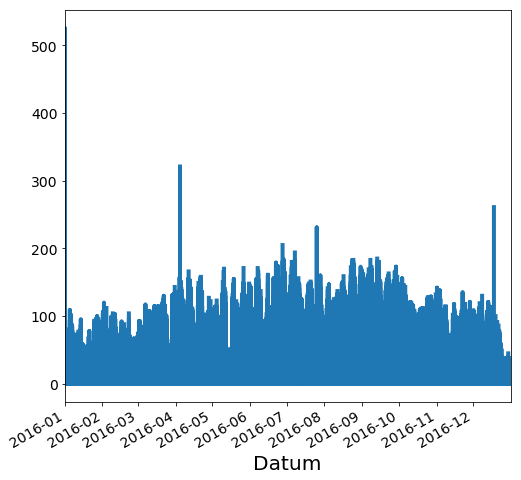

In [11]:
data.Velo_in.plot()

In [12]:
data.Standort.value_counts()

ECO09113505    34940
Y2G13124876    34940
ECO10053914    34940
Y0412032046    34940
Y2G12102807    34940
U15G3063866    34940
U15G3063872    34940
U15G3104445    34940
Y2G14045587    34940
ECO09113501    34940
ECO09113499    34940
ECO09113507    34940
U15G3063870    34940
Y2G14045586    34940
Y0410090357    34940
ECO09113506    34920
U15G3104444    34844
ECO09113502    34844
Y2G13124879    34844
ECO09113500    34783
ECO09022739    34748
Y2G13124878    34748
U15G3104443    34557
U15G3063864    34556
Y2G12102806    34460
U15G4025180    34365
ECO09113503    34172
Y2G13124875    34076
U15G3063873    33884
YPH15108550    33404
U15G3063869    32641
U15G3104442    30333
U15G3104447    25632
Y2H16039396    23712
U15G3063865    17237
Y2H16069942    17028
Y2H16069943    17028
Y2G13124877    16988
YCH16039437     7104
U15G3063867     5664
Name: Standort, dtype: int64

In [13]:
location = 'ECO09113499'
mythenquai = data[data.Standort == location]

In [14]:
mythenquai.head()

,ObjectID,Standort,Velo_in,Velo_out,Fuss_in,Fuss_out
Datum,,,,,,
2016-01-22 20:00:00,3463508,ECO09113499,2.0,1.0,NaN,NaN
2016-01-06 00:00:00,3464297,ECO09113499,0.0,0.0,NaN,NaN
2016-01-06 00:15:00,3464298,ECO09113499,0.0,2.0,NaN,NaN
2016-01-06 00:30:00,3464299,ECO09113499,0.0,0.0,NaN,NaN
2016-01-06 00:45:00,3464300,ECO09113499,0.0,0.0,NaN,NaN


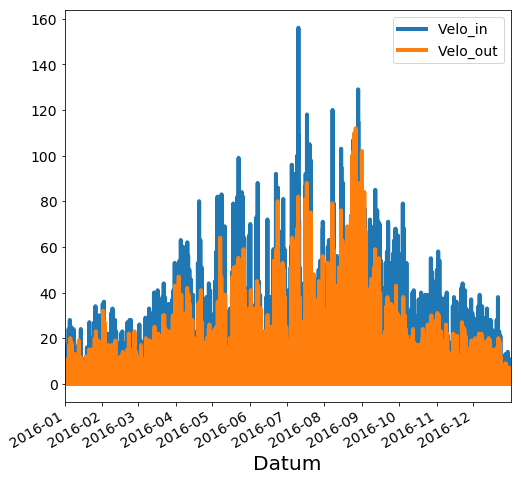

In [15]:
mythenquai.Velo_in.plot()
mythenquai.Velo_out.plot()
plt.legend(loc='best')

In [16]:
daily = mythenquai.resample('W').sum()

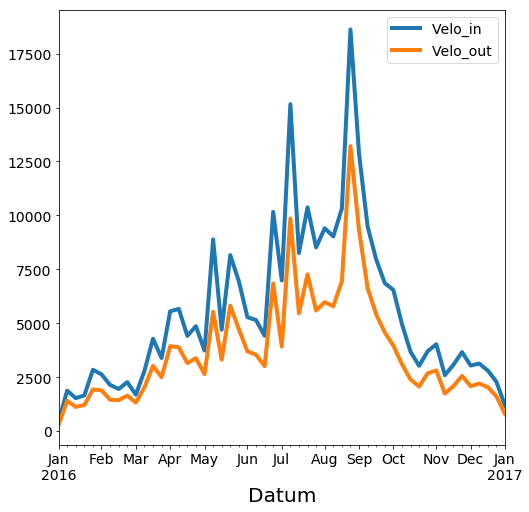

In [17]:
daily.Velo_in.plot()
daily.Velo_out.plot()
plt.legend(loc='best')

In [18]:
# subselect only the Velo data
mythenquai = mythenquai[["Velo_in", "Velo_out"]]
mythenquai = mythenquai.resample("H").sum()

In [19]:
mythenquai.head()

,Velo_in,Velo_out
Datum,,
2016-01-01 00:00:00,2.0,1.0
2016-01-01 01:00:00,4.0,2.0
2016-01-01 02:00:00,8.0,2.0
2016-01-01 03:00:00,5.0,4.0
2016-01-01 04:00:00,3.0,0.0


In [20]:
# rename for easier plotting
mythenquai.columns = ["North", "South"]

In [21]:
mythenquai['Total'] = mythenquai.North + mythenquai.South

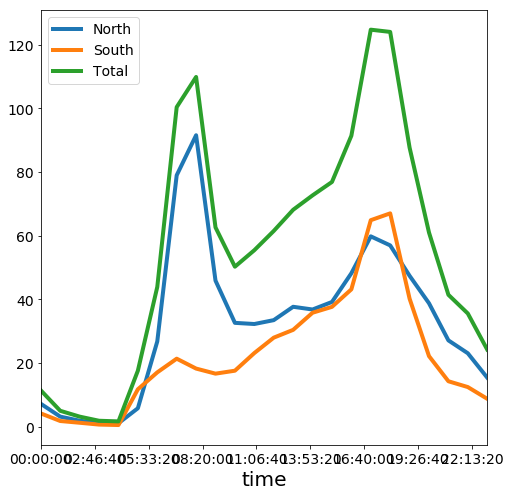

In [22]:
mythenquai.groupby(mythenquai.index.time).mean().plot()

In [23]:
pivoted = mythenquai.pivot_table("Total", index=mythenquai.index.time,
                                 columns=mythenquai.index.date)

In [24]:
pivoted.iloc[:5,:5]

,2016-01-01,2016-01-02,2016-01-03,2016-01-04,2016-01-05
00:00:00,3.0,1.0,0.0,0.0,0.0
01:00:00,6.0,1.0,0.0,0.0,0.0
02:00:00,10.0,0.0,0.0,0.0,0.0
03:00:00,9.0,0.0,1.0,0.0,0.0
04:00:00,3.0,0.0,1.0,1.0,1.0


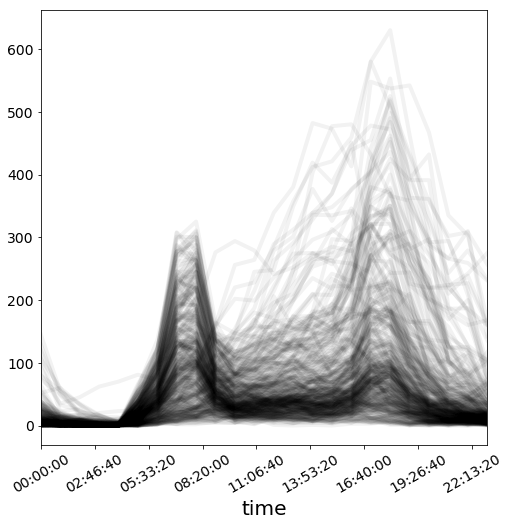

In [25]:
pivoted.plot(legend=False, alpha=0.05, color='k', rot=30);

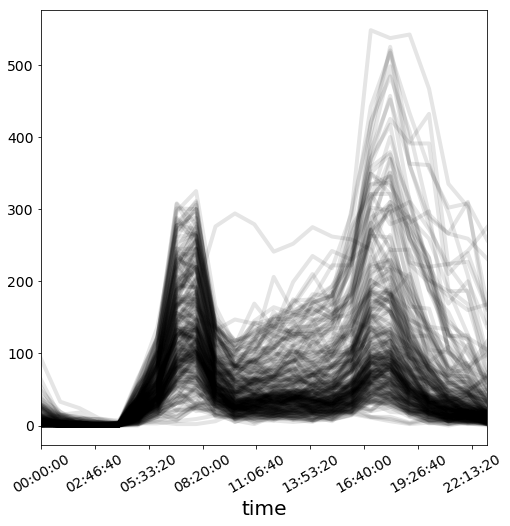

In [26]:
week = mythenquai[mythenquai.index.dayofweek.isin([0,1,2,3,4])]
week.pivot_table("Total", index=week.index.time,
                              columns=week.index.date).plot(legend=False, alpha=0.1,
                                                            color='k', rot=30)

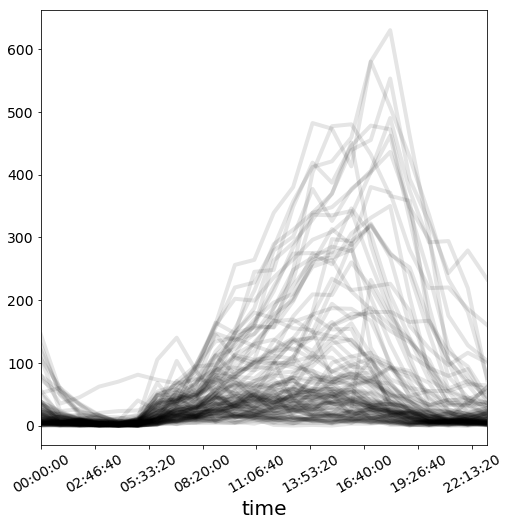

In [27]:
weekend = mythenquai[mythenquai.index.dayofweek.isin([5,6])]
weekend.pivot_table("Total",
                    index=weekend.index.time,
                    columns=weekend.index.date).plot(legend=False, alpha=0.1, 
                                                     color='k', rot=30)

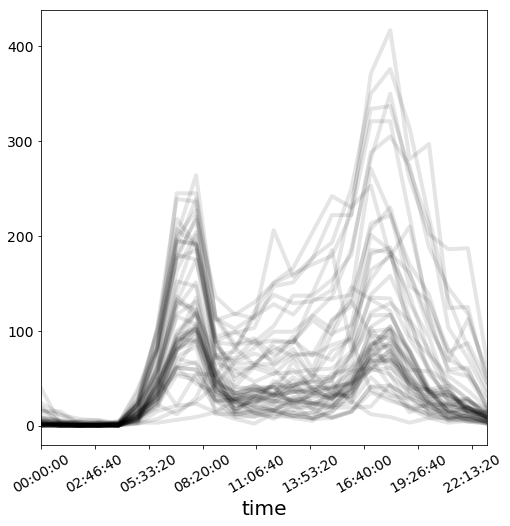

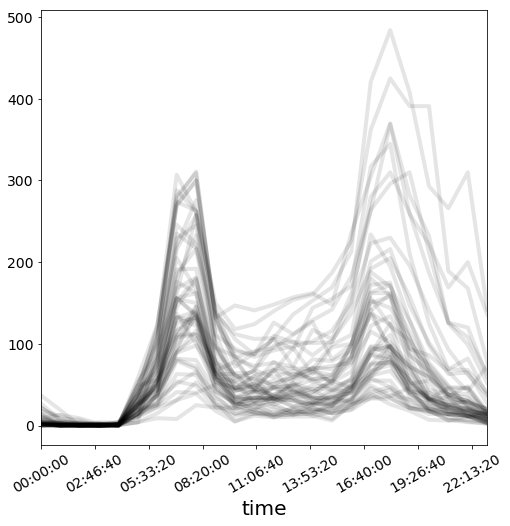

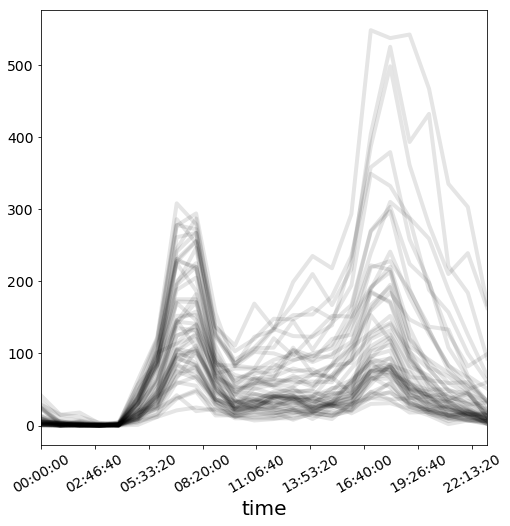

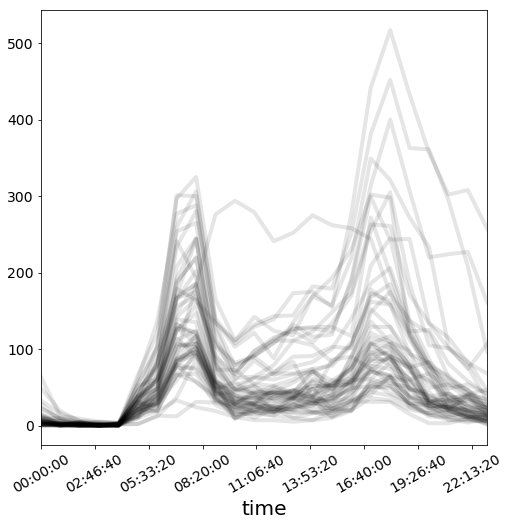

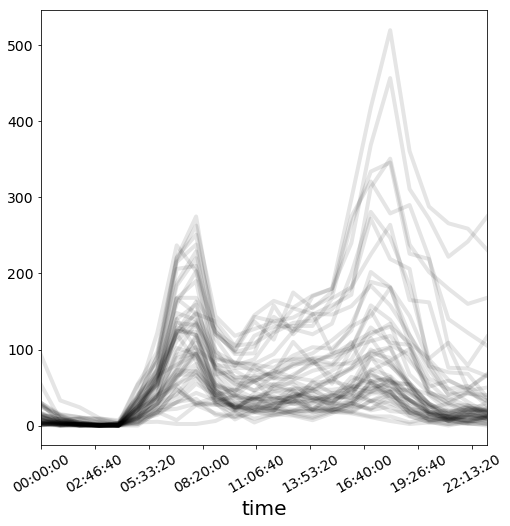

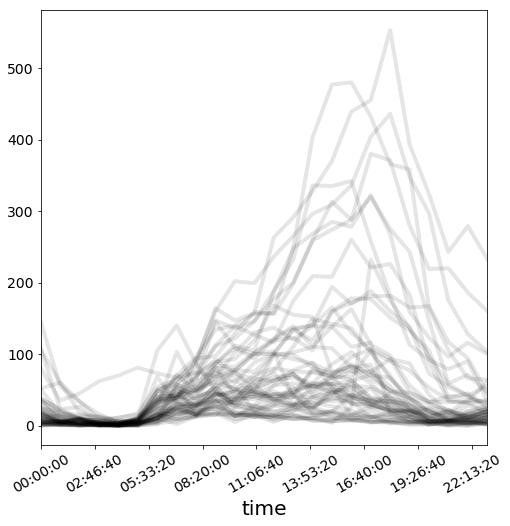

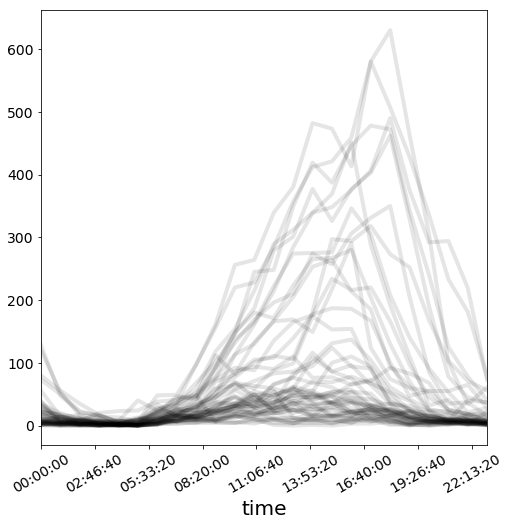

In [28]:
for day in range(7):
    daily = mythenquai[mythenquai.index.dayofweek == day]
    daily.pivot_table("Total", index=daily.index.time,
                                  columns=daily.index.date).plot(legend=False, alpha=0.1,
                                                                color='k', rot=30)
    plt.show()